True

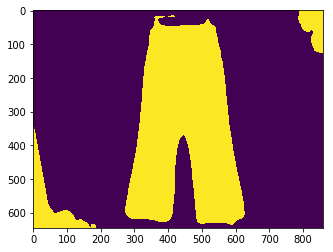

In [114]:
import numpy as np
import cv2 as cv
import cv2
from matplotlib import pyplot as plt

import cv2
from matplotlib import pyplot as plt

img = cv2.imread('img_3527984194_20.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (39, 39),0)
ret, thresh = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh)


# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 5)


# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)


# Finding sure foreground area
dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)
result_dist_transform = cv.normalize(dist_transform, None, 255, 0, cv.NORM_MINMAX, cv.CV_8UC1)
ret, sure_fg = cv.threshold(dist_transform, 0.01*dist_transform.max(),255, cv.THRESH_BINARY)



# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)


# Marker labelling
ret, markers = cv.connectedComponents(opening)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0


markers = cv.watershed(img, markers)

#img[markers == -1] = [255, 0, 0]
img[markers == 1] = [255, 255, 255]

cv2.imwrite("ddd.png",img)
#cv.imshow("dist_transform", result_dist_transform)
#cv.imshow("unknown", unknown)
#cv.imshow("sure_fg", sure_fg)
#cv.imshow("sure_bg", sure_bg)
#cv.imshow("result", img)
#cv.waitKey(0)

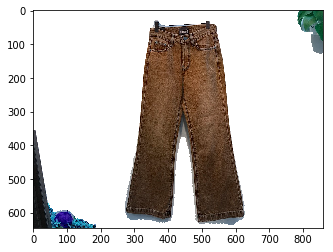

In [115]:
plt.imshow(img)